# ---------------------- Advertising Sales Channel Prediction-------------------------

### -----------------------------------------------------------------------------------------------------------------------------------------------

##### Problem Statement

# Sales Channel Prediction Case Study:-
--------------------------------------------------------------------------

**When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored..** 

**The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.** 

### ------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dff=pd.read_csv('Advertising.csv')
dff

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df= pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
df.sample(4)

,TV,radio,newspaper,sales
22,237.4,5.1,23.5,12.5
10,199.8,2.6,21.2,10.6
13,23.8,35.1,65.9,9.2
191,39.5,41.1,5.8,10.8


## Now Lets check the Null Values

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df.shape

(200, 4)

# Checking Data types of the columns

In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

**All the data are in float64 and it is a regression Problem**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# -------------------------------------------------------------------------------------------------

# EDA

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>A. Univariate Analysis <h2>

<AxesSubplot:xlabel='newspaper'>

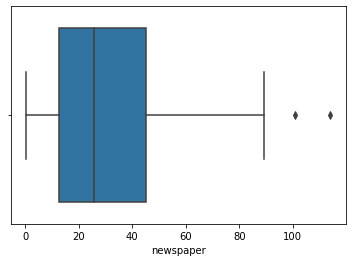

In [11]:
sns.boxplot(df['newspaper'])

**We can see that bit of Outliers is present in Newspaper**

<AxesSubplot:xlabel='TV'>

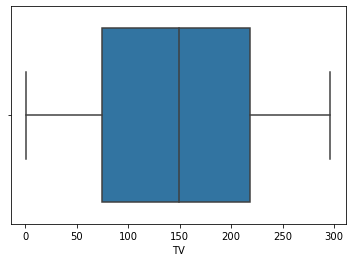

In [12]:
sns.boxplot(df['TV'])

**No Outliers is present in TV**

<AxesSubplot:xlabel='radio'>

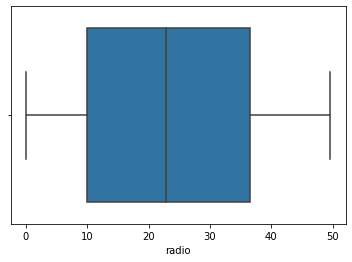

In [13]:
sns.boxplot(df['radio'])

**We cannot find any Outliers in Radio too**

<AxesSubplot:xlabel='sales'>

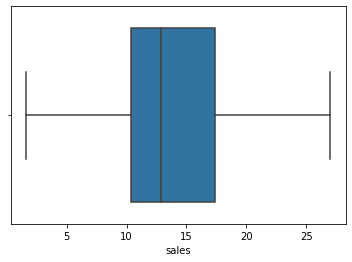

In [14]:
sns.boxplot(df['sales'])

**We cannot find any Outliers in Sales**

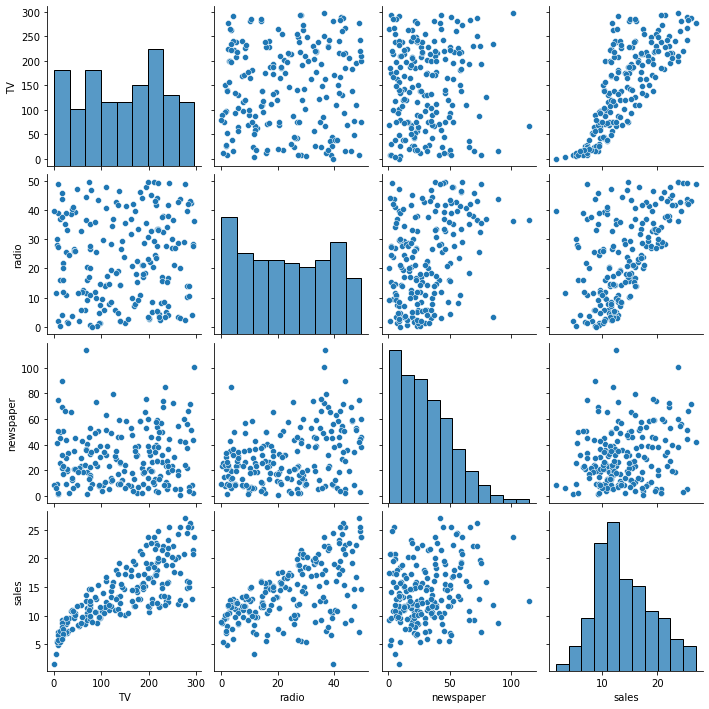

In [15]:
sns.pairplot(df)


**1. We can see in as per sales ,TV is Having a positive relationship**

**2. Well radio is also having a positive relationship as per sales but Not as strong as TV**

**3. Newspaper has the most scattered relationship as per sales**

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>B. Bivariate Analysis <h2>

<AxesSubplot:xlabel='TV', ylabel='sales'>

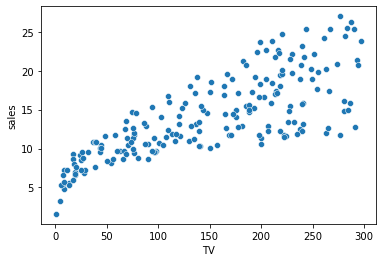

In [16]:
sns.scatterplot(df['TV'],df['sales'])

**We can see that the sales of TV tend to increase Positively**

<AxesSubplot:xlabel='radio', ylabel='sales'>

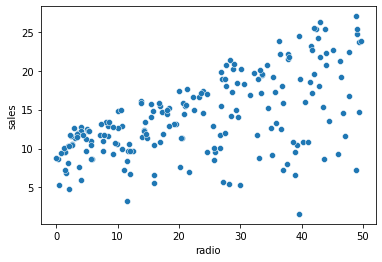

In [17]:
sns.scatterplot(df['radio'],df['sales'])

**Well radio is also having a positive relationship as per sales but Not as strong as TV bcz it tend to decrease at some places**

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

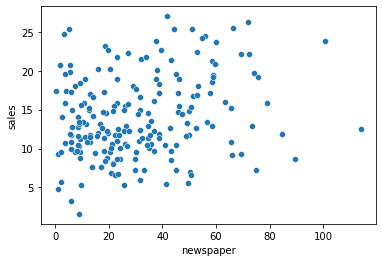

In [18]:
sns.scatterplot(df['newspaper'],df['sales'])

**Newspaper has the most scattered relationship as per sales and it is in between 0 to 80**

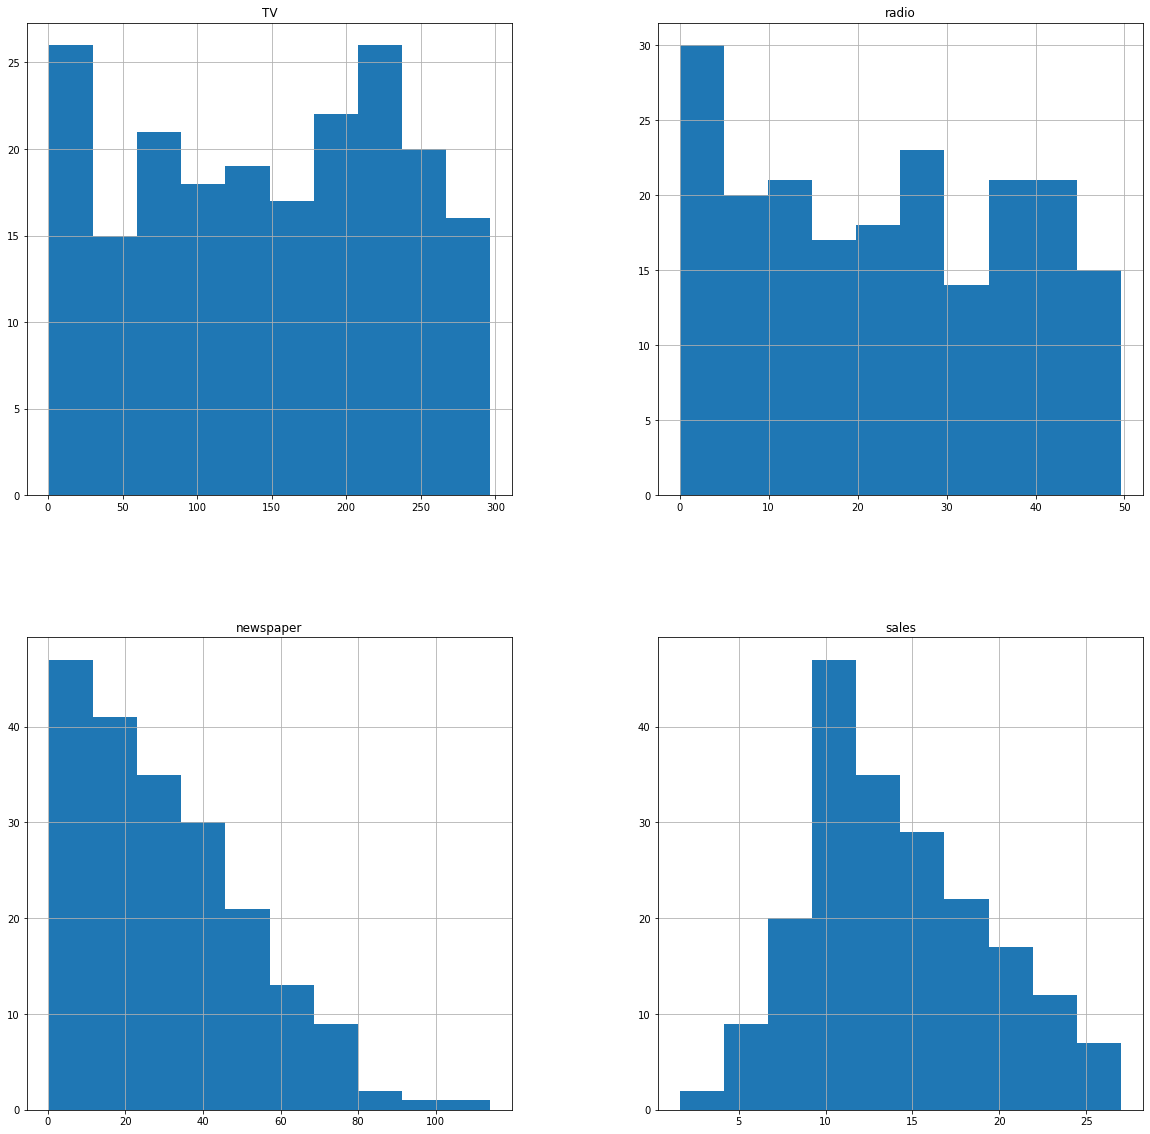

In [19]:
df.hist(bins=10, figsize=(20,20))
plt.show()

**The Dataset is not Normalized so lets Normalize It and remove skewness**

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'> CORRELATION <h2>

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [21]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

**Here TV is the most Correlated to sales and Newspaper is the least Correlated to Sales.. and dont find here any Multicollinearity Bcz all the data coloumns are seprately correlated to sales**

<AxesSubplot:>

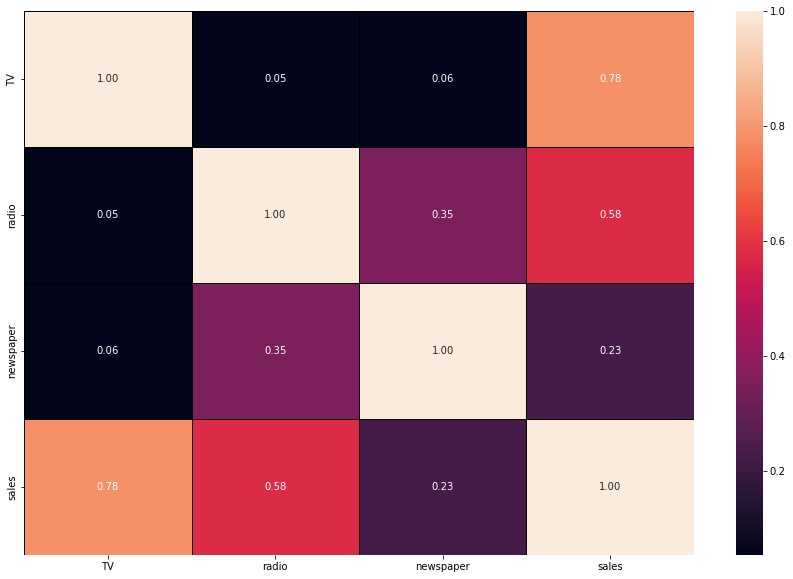

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

<h2 style='text-align:center;font-size:15px;background-color:CRIMSON;border:20px;color:white'> % of input variable correlated to target variable <h2>

**newspaper    0.23%**

**radio        0.58%**

**TV           0.78%**

------------------------------------------------------------------------------

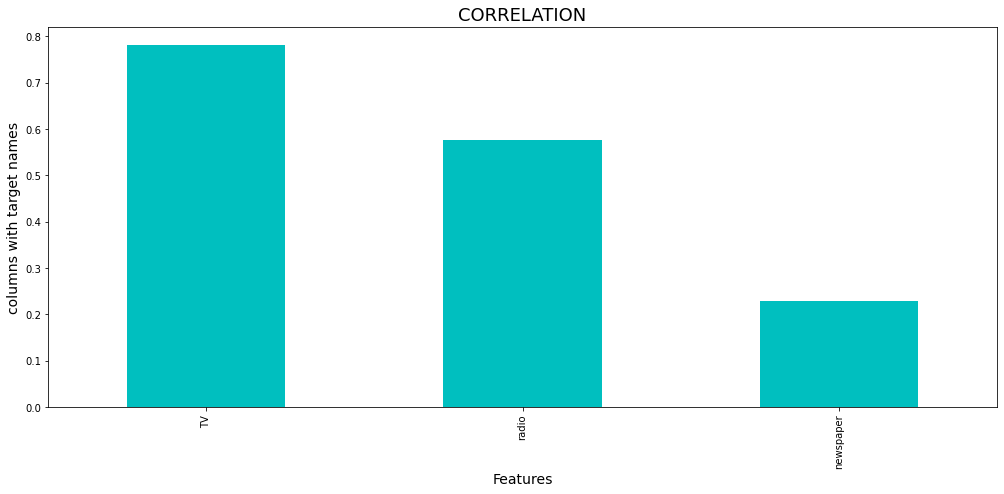

In [23]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

**Its clearly visible that here their is no case of Multicollinearity**

<h2 style='text-align:center;font-size:30px;background-color:CRIMSON;border:20px;color:white'>Descriptive Statistics<h2>


In [24]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

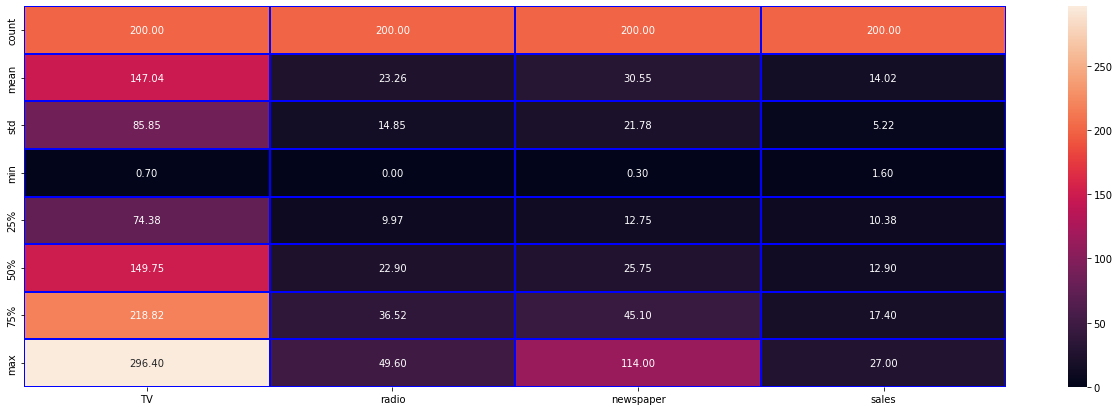

In [25]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

#### Outcome of describe() of dataset :-

**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**Rows :- 200**

**columns :- 4**



**TV**


Mean    :- 147.04

std     :- 85.85

minimum :- 0.70

Maximum :- 296.40
    
**Radio**


Mean    :- 23.26

std     :- 14.85

minimum :- 0.00

Maximum :- 49.60
    

**Newspaper**

Mean    :- 30.55

std     :- 21.78

minimum :- 0.30

Maximum :- 114.00
    
    
**Sales**

Mean    :- 14.02

std     :- 5.22

minimum :- 1.06

Maximum :- 27.00

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**All Columns have Non Null values and dtypes of columns are all float64**

# Now Lets Check Outliers 1st

TV              AxesSubplot(0.125,0.749828;0.133621x0.130172)
radio        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
newspaper     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sales        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

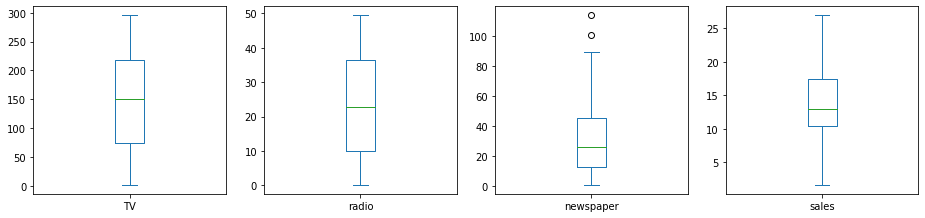

In [27]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

**We have Outliers Present at Newspaper**

# Now Lets Check Skewness 

In [28]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

**I can find newspaper is bit skewed**

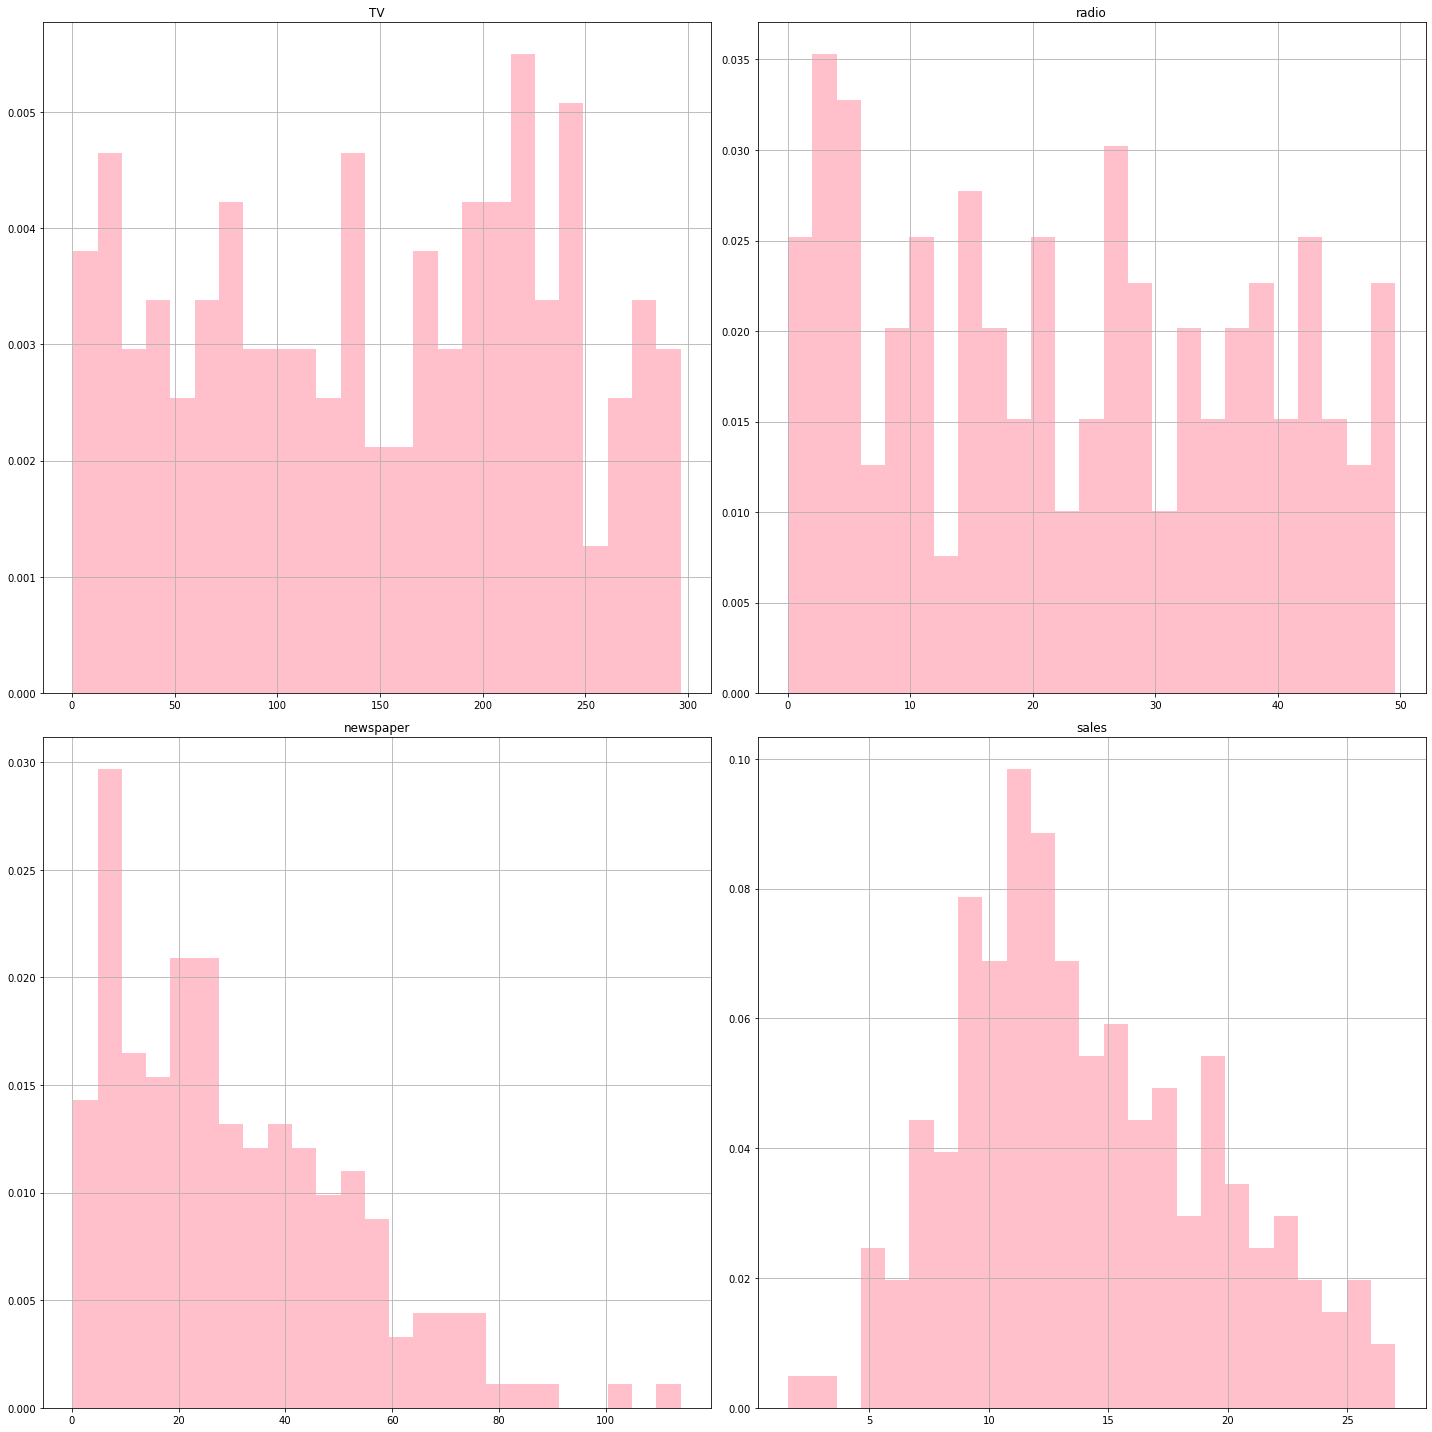

In [29]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

**WE can see that data is not normalized we have to treat this but we will remove outliers first...**

# Considering the outliers removal

In [30]:
df.shape

(200, 4)

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
df_new.shape

(198, 4)

In [34]:
# Percentage of data loss

DataLoss=((200-198)/200)*100
DataLoss

1.0

# Seprating the columns into features and target

In [35]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [36]:
#Independent Variable
x=df.iloc[:,:-1]


y=df.iloc[:,-1]

In [37]:
x.shape

(200, 3)

In [38]:
y.shape

(200,)

# Transforming data to remove skewness

In [39]:
from sklearn.preprocessing import power_transform

In [40]:
x=power_transform(x,method='yeo-johnson')

In [41]:
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [42]:
from sklearn.preprocessing import StandardScaler

#transform my dataset into a standard normal distribution

sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [43]:
x.mean()

1.1842378929335004e-17

In [44]:
x.std()

1.0

# Model Training and testing 

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(pred_train,y_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(r2_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(r2_score(y_test,pred_test)*100,1),  '\n\n')

At random state  66  The model performs very well
At random_state:- 66
Training accuaracy_score is :- 90.9
Testing accuracy_score is:- 90.0 


At random state  74  The model performs very well
At random_state:- 74
Training accuaracy_score is :- 90.6
Testing accuracy_score is:- 89.7 


At random state  146  The model performs very well
At random_state:- 146
Training accuaracy_score is :- 90.9
Testing accuracy_score is:- 90.0 


At random state  176  The model performs very well
At random_state:- 176
Training accuaracy_score is :- 90.8
Testing accuracy_score is:- 89.8 


At random state  216  The model performs very well
At random_state:- 216
Training accuaracy_score is :- 90.7
Testing accuracy_score is:- 89.7 




In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=66)

In [48]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [50]:
print (r2_score(y_test,pred_test))

0.8996390781190254


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [51]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 4 the cv score is 0.9010704953541404 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is -0.9605039488604983 and accuracy for testing is 0.8996390781190254



At cross fold 8 the cv score is 0.8958223041714927 and accuracy 

**I will take cv 5 bcz it is near to r2_score accuracy bcz here the cv score is 90% and accuracy score is also 90%**

In [52]:
from sklearn import metrics

In [53]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)

In [54]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 1.2310394822806816
mean squared error: 3.209827683125167


In [55]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1.791599197121155


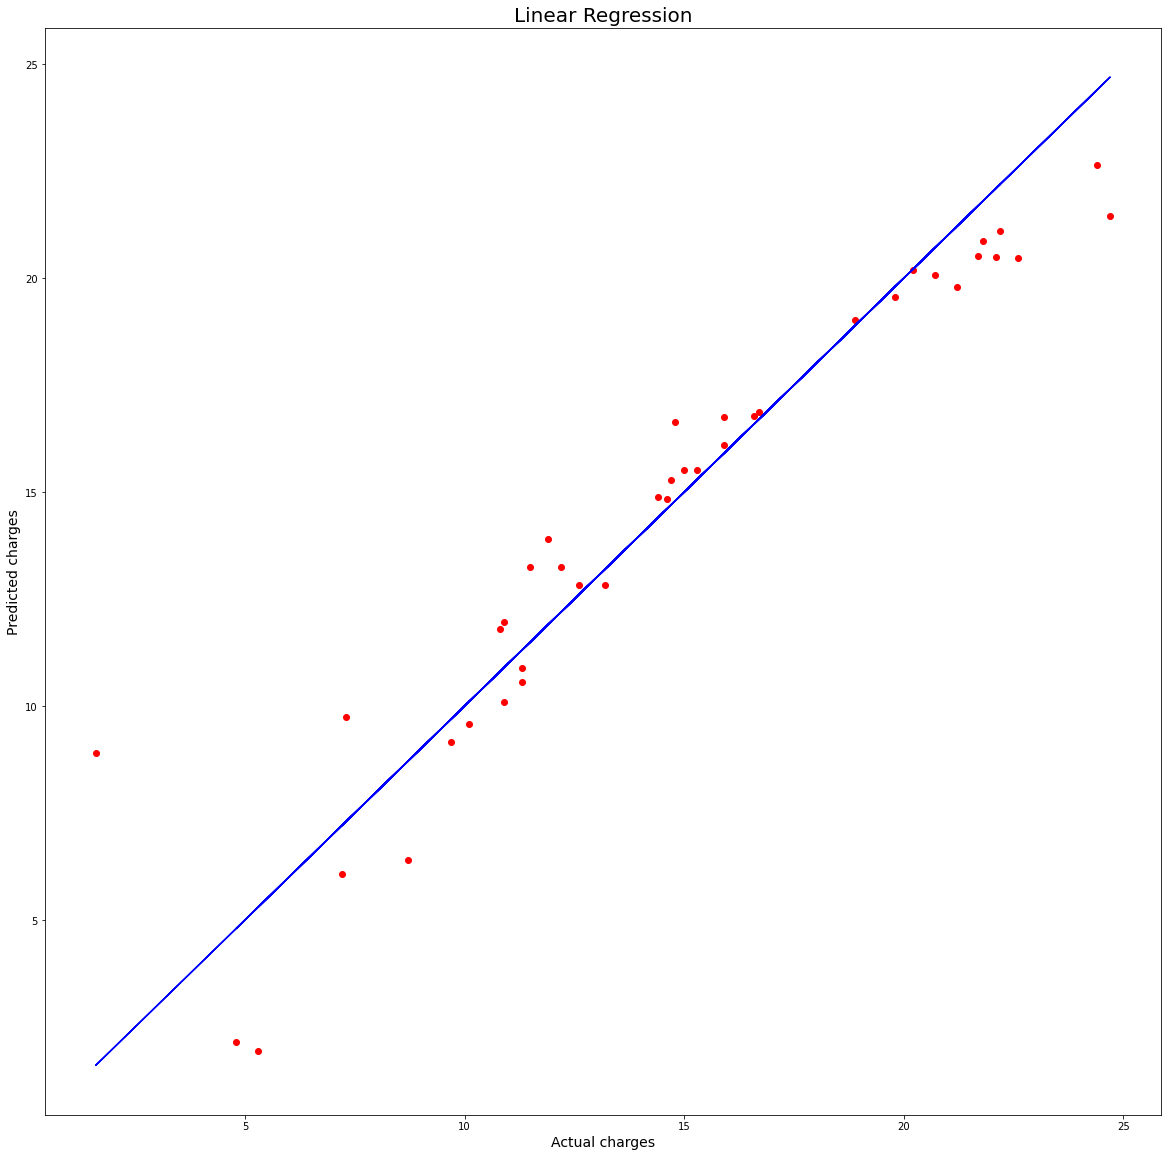

In [56]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

**Here we can see that the data is falling on the best fit line which indicates that model is performing well**

# Lets Train with other regressor model

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [58]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    if round(r2_score(pred_train,y_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(r2_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(r2_score(y_test,pred_test)*100,1),  '\n\n')

**So Here we can see that in DecisionTreeRegressor there is no random state where training and testing values are same**

**so now let try with nearby training and testing score**

In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 1.0
At random state 0,the testing accuracy is :- 0.9258487052221888



At random state 1,the training accuracy is :- 1.0
At random state 1,the testing accuracy is :- 0.9620844915543104



At random state 2,the training accuracy is :- 1.0
At random state 2,the testing accuracy is :- 0.9562752693178962



At random state 3,the training accuracy is :- 1.0
At random state 3,the testing accuracy is :- 0.962655135831442



At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 0.9630025840978633



At random state 5,the training accuracy is :- 1.0
At random state 5,the testing accuracy is :- 0.9625890600376896



At random state 6,the training accuracy is :- 1.0
At random state 6,the testing accuracy is :- 0.9317582984662696



At random state 7,the training accuracy is :- 1.0
At random state 7,the testing accuracy is :- 0.9683787034244459



At random state 8,the training accuracy is :- 1.0
At random state

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [62]:
# train the model
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
# predict the  data with x_test

pred_test=dt.predict(x_test)

In [64]:
print (r2_score(y_test,pred_test))

0.9658336695163938


# CROSS VALIDATION OF THE  DECISIONTREEREGRESSOR MODEL

In [66]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 4 the cv score is 0.9010704953541404 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is -0.969723337748905 and accuracy for testing is 0.9658336695163938



At cross fold 8 the cv score is 0.8958223041714927 and accuracy score 

**Here i can see that there is lot of difference between cv score and accuracy score ,so this is not a good method**

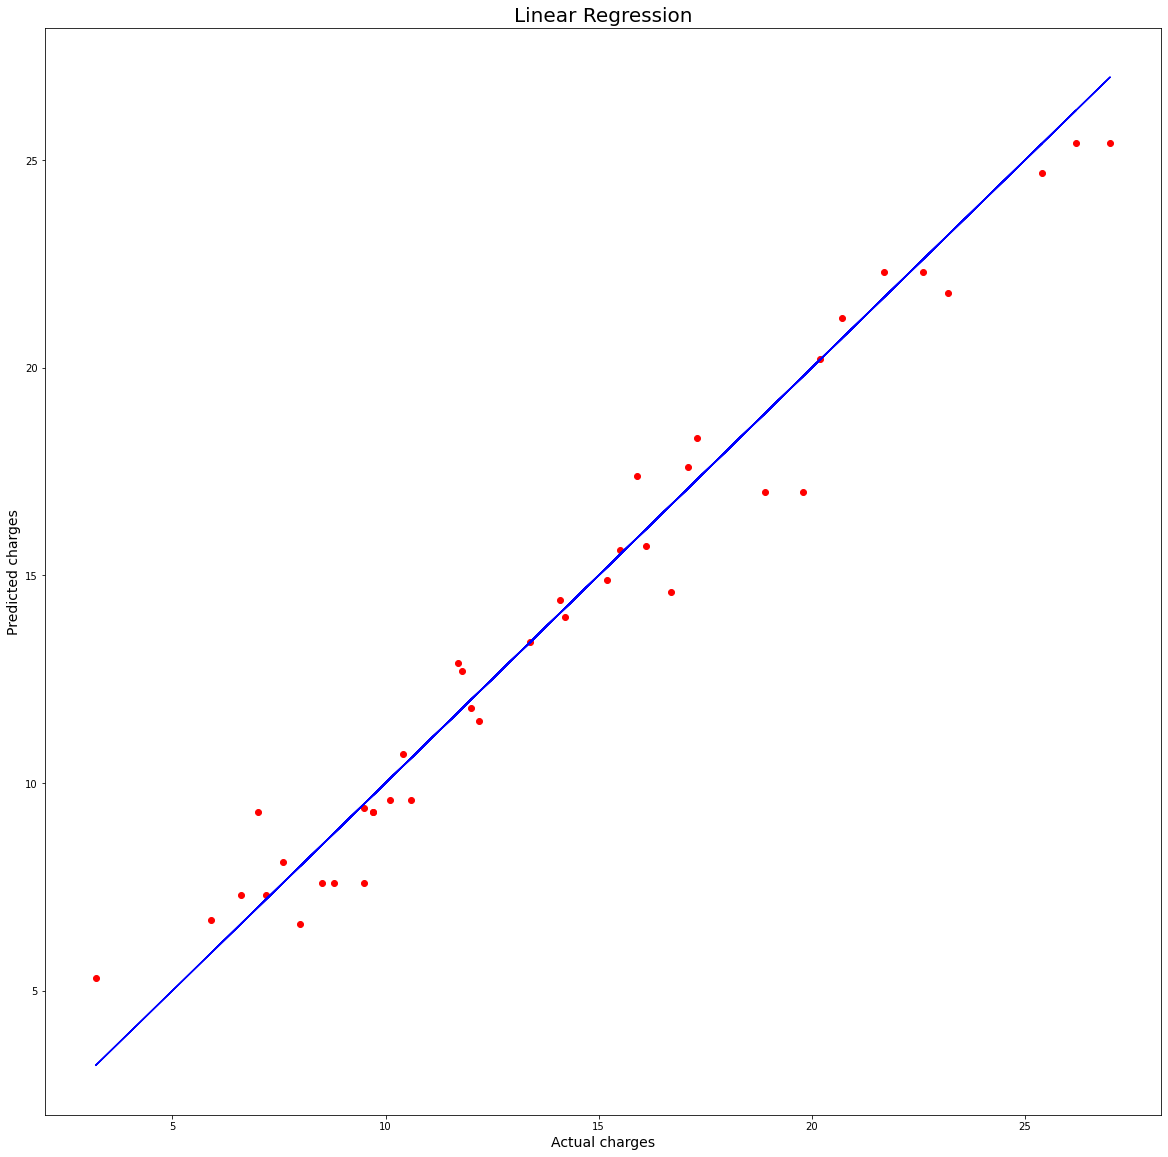

In [67]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

# Lets Train with Another Regressor Model

In [68]:
from sklearn.svm import SVR
sv=SVR()

In [69]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    sv.fit(x_train,y_train)
    pred_train=sv.predict(x_train)
    pred_test=sv.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9357016330216024
At random state 0,the testing accuracy is :- 0.9024111956069574



At random state 1,the training accuracy is :- 0.929940929504491
At random state 1,the testing accuracy is :- 0.9651108971181077



At random state 2,the training accuracy is :- 0.937910198189087
At random state 2,the testing accuracy is :- 0.9163248881581868



At random state 3,the training accuracy is :- 0.9402402539666365
At random state 3,the testing accuracy is :- 0.8900058337020826



At random state 4,the training accuracy is :- 0.9316936257359529
At random state 4,the testing accuracy is :- 0.9183454487620117



At random state 5,the training accuracy is :- 0.9273177313317091
At random state 5,the testing accuracy is :- 0.9656004114812782



At random state 6,the training accuracy is :- 0.9338531185379827
At random state 6,the testing accuracy is :- 0.9417623196326521



At random state 7,the training accuracy is :- 0.9372214014273546
At random sta

At random state 76,the training accuracy is :- 0.9375541302352404
At random state 76,the testing accuracy is :- 0.913439192949044



At random state 77,the training accuracy is :- 0.9340601081432062
At random state 77,the testing accuracy is :- 0.9240435375312495



At random state 78,the training accuracy is :- 0.9377026997910084
At random state 78,the testing accuracy is :- 0.8869555658063187



At random state 79,the training accuracy is :- 0.9252055258831311
At random state 79,the testing accuracy is :- 0.9065545396853483



At random state 80,the training accuracy is :- 0.9387945985227576
At random state 80,the testing accuracy is :- 0.9125269988055988



At random state 81,the training accuracy is :- 0.9370575169131136
At random state 81,the testing accuracy is :- 0.9273999577969766



At random state 82,the training accuracy is :- 0.9410863016810307
At random state 82,the testing accuracy is :- 0.9216947635905229



At random state 83,the training accuracy is :- 0.92343784524134

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [72]:
# train the model
sv.fit(x_train,y_train)

SVR()

In [73]:
# predict the  data with x_test

pred_test=sv.predict(x_test)

In [74]:
print (r2_score(y_test,pred_test))

0.9417623196326521


# CROSS VALIDATION OF THE SVR MODEL

In [76]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 4 the cv score is 0.9010704953541404 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is -0.8146981745836199 and accuracy for testing is 0.9417623196326521



At cross fold 8 the cv score is 0.8958223041714927 and accuracy 

###### Here i can see that there is lot of difference between cv score and accuracy score ,so this is not a good method

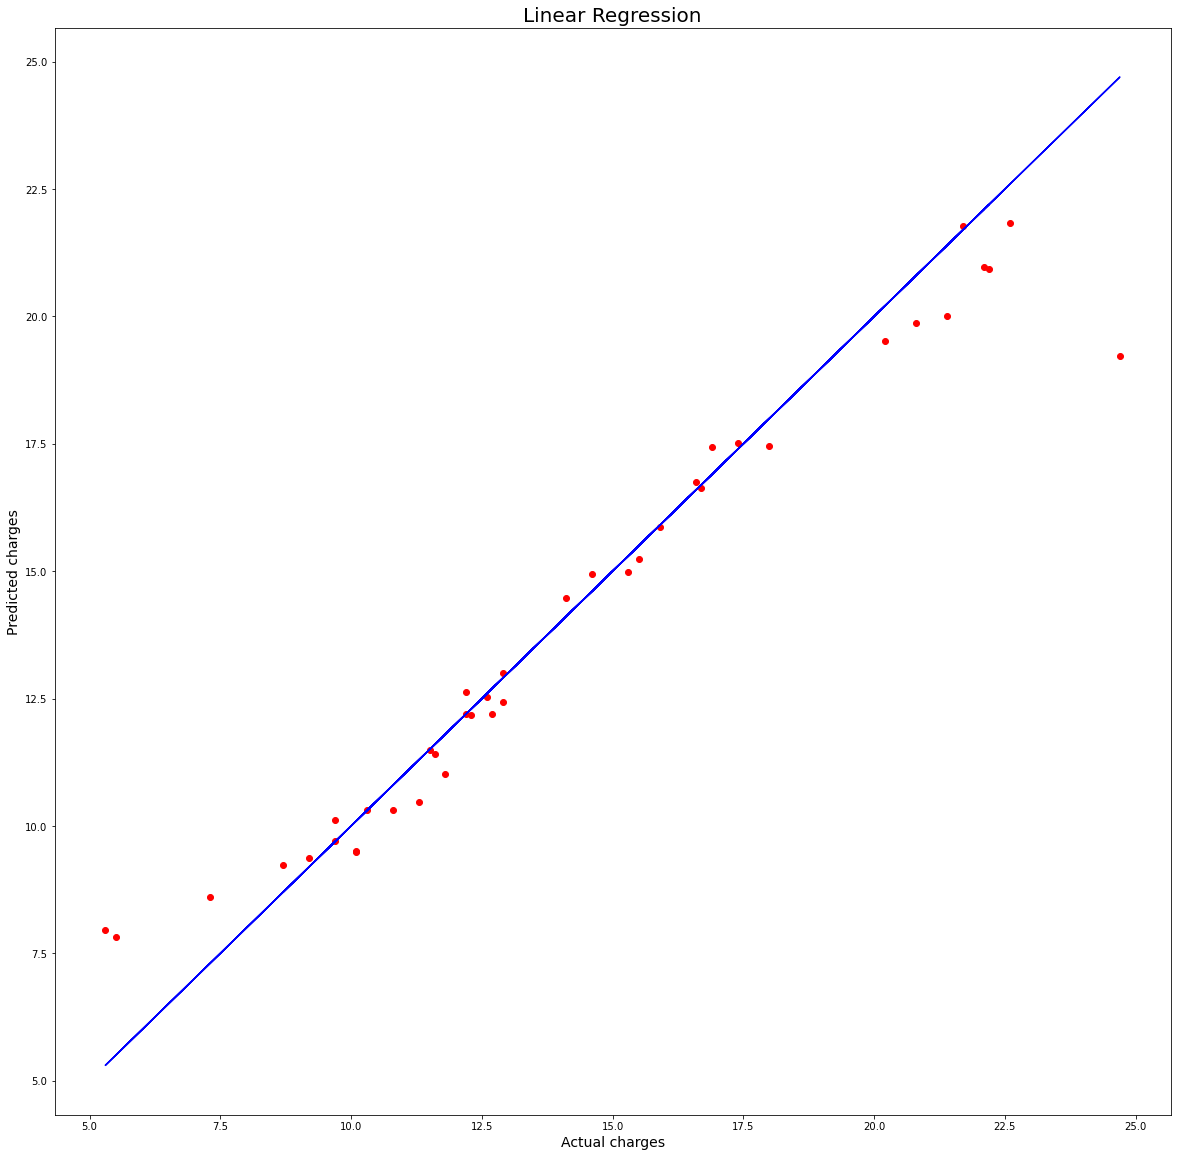

In [77]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

# Let Try another model

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [79]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.960404181154282
At random state 0,the testing accuracy is :- 0.9281455364141923



At random state 1,the training accuracy is :- 0.9604341918276134
At random state 1,the testing accuracy is :- 0.9573854988995149



At random state 2,the training accuracy is :- 0.9601302135950431
At random state 2,the testing accuracy is :- 0.9312311862705153



At random state 3,the training accuracy is :- 0.9593275552161428
At random state 3,the testing accuracy is :- 0.9381599453328796



At random state 4,the training accuracy is :- 0.9604455345798537
At random state 4,the testing accuracy is :- 0.933141164624842



At random state 5,the training accuracy is :- 0.9589070920957785
At random state 5,the testing accuracy is :- 0.9671834977735613



At random state 6,the training accuracy is :- 0.9603383908034133
At random state 6,the testing accuracy is :- 0.9328441959870558



At random state 7,the training accuracy is :- 0.9612773258513269
At random sta

At random state 76,the training accuracy is :- 0.9587496312389837
At random state 76,the testing accuracy is :- 0.9234661843168037



At random state 77,the training accuracy is :- 0.9604759707929607
At random state 77,the testing accuracy is :- 0.9415141517238375



At random state 78,the training accuracy is :- 0.9640960124489399
At random state 78,the testing accuracy is :- 0.9019381550289152



At random state 79,the training accuracy is :- 0.952199779607895
At random state 79,the testing accuracy is :- 0.9600716104765263



At random state 80,the training accuracy is :- 0.9664442606061454
At random state 80,the testing accuracy is :- 0.9187415251107874



At random state 81,the training accuracy is :- 0.9646625712602352
At random state 81,the testing accuracy is :- 0.9335900860328602



At random state 82,the training accuracy is :- 0.9736737832971831
At random state 82,the testing accuracy is :- 0.9094461131029149



At random state 83,the training accuracy is :- 0.95575534046396

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [81]:
# train the model
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
# predict the  data with x_test

pred_test=knn.predict(x_test)

In [83]:
print (r2_score(y_test,pred_test))

0.9618816259428523


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL

In [85]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,50):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is 0.9042245206305917 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 3 the cv score is 0.9005133366024932 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 4 the cv score is 0.9010704953541404 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 5 the cv score is 0.8978060430607071 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 6 the cv score is 0.9020141622653224 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 7 the cv score is 0.8982025458270028 and accuracy score for training is -1.1314189470606086 and accuracy for testing is 0.9618816259428523



At cross fold 8 the cv score is 0.8958223041714927 and accuracy 

###### Here the difference between cv and accuracy score is too much so we will not consider this model

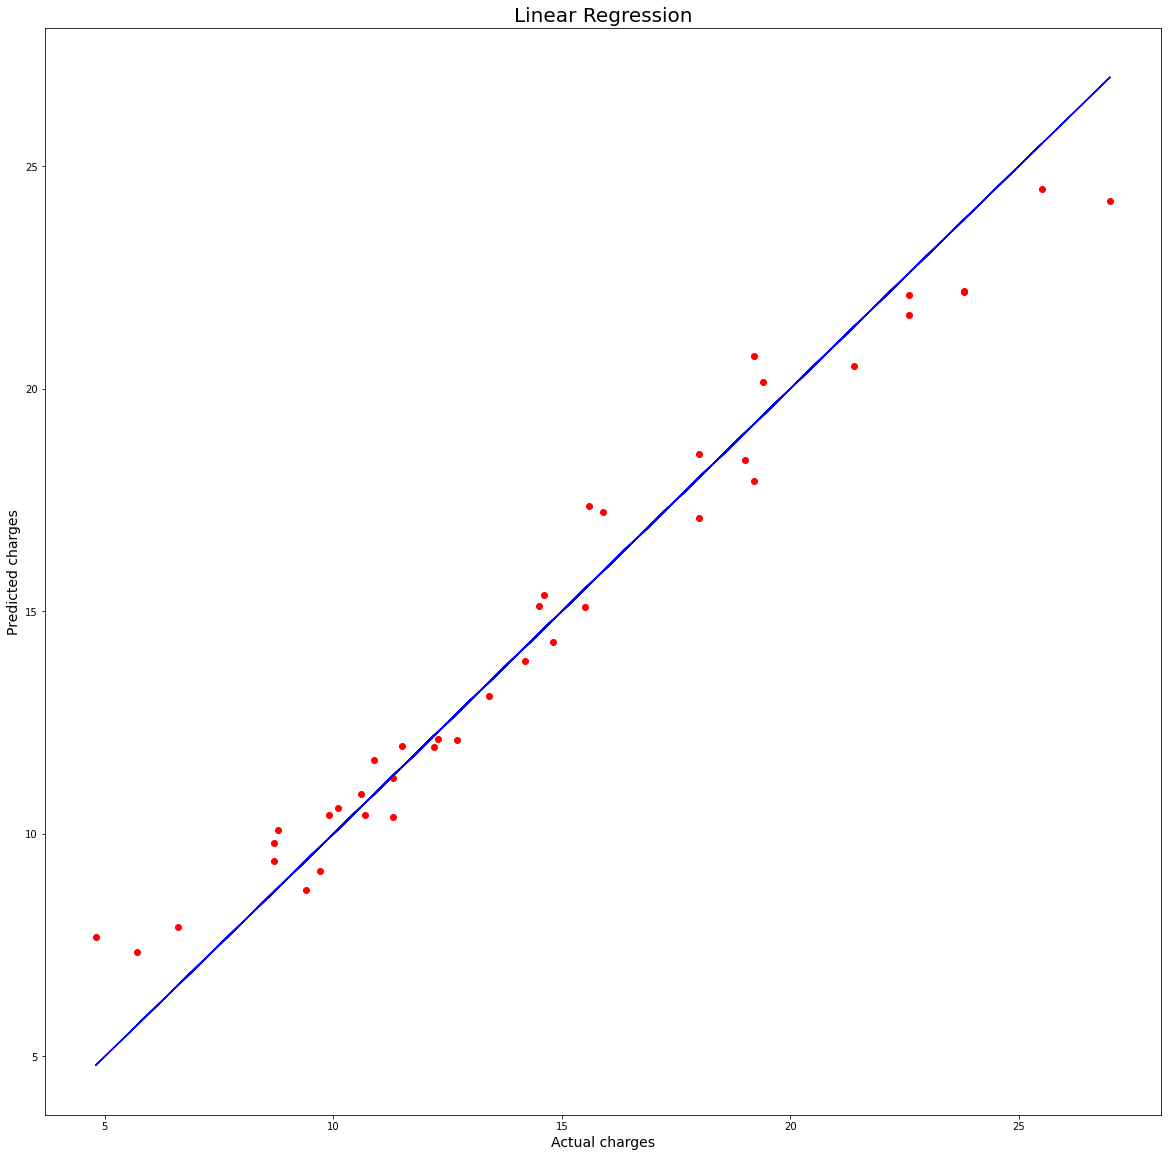

In [86]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

# ---------------------------------------------------------------------------------------

# Hyper Parameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [88]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)


{'alpha': 0.1, 'random_state': 0}


In [89]:
# Final model training
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

82.81555292107304

In [90]:
pred_ls=ls.predict(x_test)

In [91]:
lss=r2_score(y_test,pred_ls)
lss*100


81.99865445557207

In [92]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

82.70960357806553

###### Over Linear Regression model is performing better than lasso

# HPT on RandonForestRegressor

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [94]:
parameter={'criterion' :['mse','mae'],
          'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [95]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print ('R2 Score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print ('Cross Val Score:',rfc*100)

R2 Score : 98.58236929653114
Cross Val Score: 97.67620617305195


##### Random forest Regressor is performing the best and the difference between r2_score and cross_val_score is also less its just 1%

# Save the model

In [96]:
import pickle
filename='ASCP.pkl'
pickle.dump(rf,open(filename,'wb'))

In [97]:
loaded_model=pickle.load(open('ASCP.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.58236929653114
